In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft

In [110]:
c = 299792458


In [111]:
# chirp sequence frequency
f_chirp = 50*1e3 #Hz

# ramp frequency
f_r = 200*1e6 #Hz
T_r = 1/f_chirp # duration of one cycle
m_w = f_r/T_r

n_r = 150 # number of chirps
T_M = T_r*n_r

In [112]:
# sample settings
f_s = 50e6 #50 MHz
n_s = int(T_r*f_s)

In [113]:
f_0 = 77.7*1e9

# some helpful
w_0 = 2*np.pi*f_0
lambda_0 = c/f_0

In [114]:
def f_transmitted(t):
    return f_0 + m_w*(t%T_r)

In [115]:
def chirp(t):
    return np.cos(2*np.pi*(f_transmitted(t))*t)

In [116]:
1e6

1000000.0

In [117]:
t = np.linspace(0, 3*T_r, int(1e6))


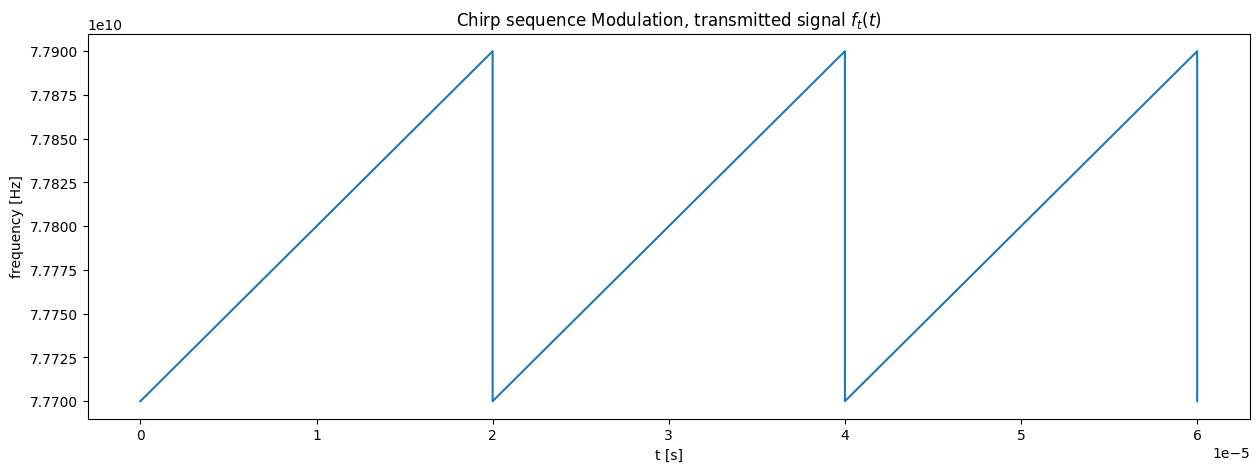

In [118]:
plt.figure(figsize=(15,5))
plt.plot(t, f_transmitted(t))
plt.xlabel("t [s]")
plt.ylabel("frequency [Hz]")
plt.title("Chirp sequence Modulation, transmitted signal $f_t(t)$");

In [119]:
r_0 = 50 # initial distance
v_veh = 36/3.6 # velocity

In [120]:
def get_range(t):
    return r_0+v_veh*t

In [121]:
4*np.pi*100*f_0/c, 2*np.pi*(2*100/c)**2*m_w

(325694.31641129137, 27.963945936914552)

In [122]:
def itr(t):
    r = get_range(t)
    w_itr = 2*f_0*v_veh/c + 2*m_w*r/c
    # we do t%T_r because the eq. above only valid within the ramp
    v = np.cos(2*np.pi*w_itr*(t%T_r) +2*r*2*np.pi*f_0/c)
    return v

In [123]:
print(n_r, n_s)


150 1000


In [124]:
t_sample = np.linspace(0, T_M, n_r*n_s)


In [125]:
v_sample = itr(t_sample)


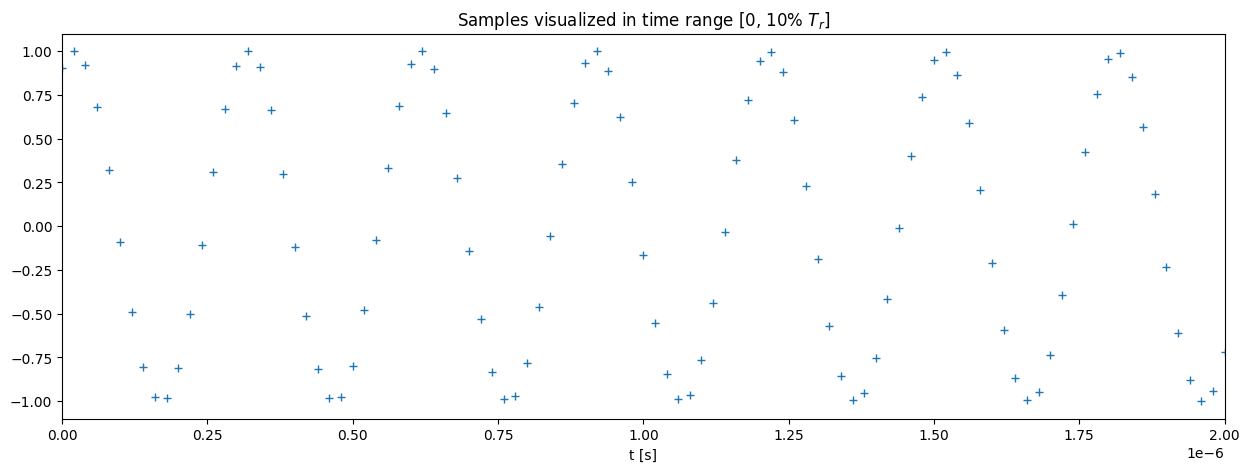

In [126]:
plt.figure(figsize=(15,5))
plt.plot(t_sample, v_sample, "+")
plt.xlim(0, 0.1*T_r)
plt.xlabel("t [s]")
plt.title("Samples visualized in time range [0, 10% $T_r$]");

In [127]:
table = np.zeros((n_r, n_s))


In [128]:
for chirp_nr in range(n_r):
    table[chirp_nr, :] = v_sample[(chirp_nr*n_s):(n_s*(chirp_nr+1))]

In [129]:
table_df = pd.DataFrame(data=table, 
                        columns=["sample_%03d"%i for i in range(n_s)], 
                        index=["chirp_%03d"%i for i in range(n_r)])

In [130]:
table_df.head(10)


,sample_000,sample_001,sample_002,sample_003,sample_004,sample_005,sample_006,sample_007,sample_008,sample_009,...,sample_990,sample_991,sample_992,sample_993,sample_994,sample_995,sample_996,sample_997,sample_998,sample_999
chirp_000,0.905353,0.999836,0.920138,0.680144,0.321662,-0.092857,-0.491199,-0.803969,-0.976681,-0.979245,...,0.415170,0.007652,-0.401199,-0.740157,-0.950170,-0.994652,-0.865854,-0.586214,-0.204448,0.212936
chirp_001,0.976847,0.804429,0.491871,0.093624,-0.320933,-0.679581,-0.919838,-0.999850,-0.905677,-0.653725,...,-0.225759,-0.603753,-0.876566,-0.996670,-0.943140,-0.725302,-0.381107,0.029482,0.434935,0.764616
chirp_002,0.644981,0.276856,-0.139501,-0.531555,-0.831006,-0.985685,-0.968646,-0.782858,-0.460686,-0.058257,...,-0.773011,-0.964635,-0.988205,-0.839616,-0.544753,-0.154986,0.261782,0.632944,0.893837,0.999011
chirp_003,0.046790,-0.365037,-0.713270,-0.937241,-0.997932,-0.884770,-0.617469,-0.242597,0.174539,0.561268,...,-0.999508,-0.925246,-0.689792,-0.334165,0.079680,0.479643,0.796044,0.973761,0.981834,0.818855
chirp_004,-0.570722,-0.856199,-0.992513,-0.955916,-0.752785,-0.418507,-0.011319,0.397840,0.737690,0.949024,...,-0.811267,-0.501932,-0.105152,0.309948,0.671049,0.915242,0.999983,0.910510,0.662410,0.298907
chirp_005,-0.952571,-0.993817,-0.861923,-0.579868,-0.196791,0.220570,0.599505,0.873996,0.996222,0.944891,...,-0.286397,0.129656,0.523121,0.825448,0.983966,0.971059,0.788975,0.469436,0.068113,-0.345076
chirp_006,-0.941085,-0.721066,-0.375424,0.035623,0.440464,0.768568,0.962774,0.989248,0.843378,0.550576,...,0.357312,0.707445,0.934326,0.998429,0.888586,0.623932,0.250578,-0.166433,-0.554448,-0.845866
chirp_007,-0.541005,-0.150571,0.266096,0.636404,0.895838,0.999200,0.928483,0.696006,0.342272,-0.071093,...,0.852756,0.991682,0.957836,0.757114,0.424486,0.017904,-0.391798,-0.733240,-0.946936,-0.995655
chirp_008,0.082467,0.482098,0.797739,0.974397,0.981296,0.817232,0.510791,0.115359,-0.300171,-0.663405,...,0.994356,0.864427,0.583895,0.201635,-0.215755,-0.595555,-0.871595,-0.995784,-0.946484,-0.732285
chirp_009,0.671886,0.915698,0.999976,0.910036,0.661548,0.297805,-0.117823,-0.512924,-0.818662,-0.981771,...,0.723355,0.378482,-0.032331,-0.437512,-0.766468,-0.961886,-0.989720,-0.845120,-0.553281,-0.165046


In [131]:
chirp0_samples = table_df.iloc[0].values


In [132]:
chirp0_magnitude = fft(chirp0_samples)


In [133]:
frequencies = np.arange(0, n_s//2)*f_s/n_s


In [134]:
f_star1 = 2*m_w/c*100
f_star2 = 2*f_0/c*33
print(f_star1, f_star2)
print(f_star2/f_star1*100, "%")

6671281.9039630415 17105.833929951634
0.25640999999999997 %


In [135]:
def freq_to_range(f):
    return f*c/(2*m_w)

In [136]:
ranges = freq_to_range(frequencies)


50.215236715


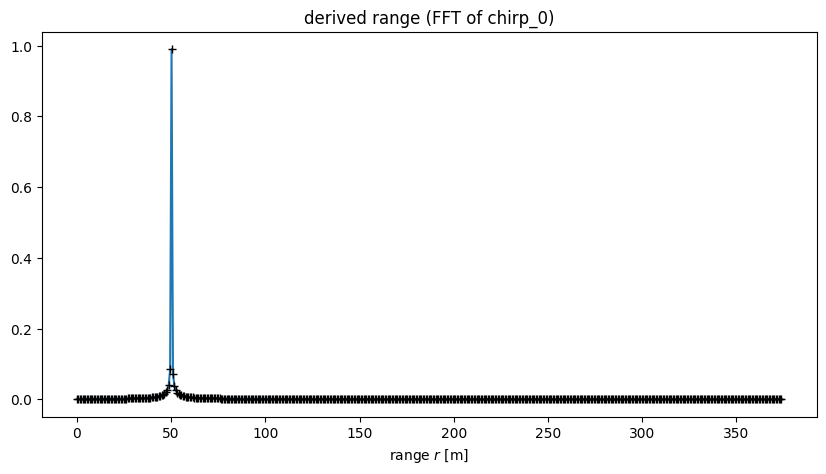

In [137]:
plt.figure(figsize=(10,5))
plt.plot(ranges, 2.0/n_s*np.abs(chirp0_magnitude[0:n_s//2]))
plt.plot(ranges, 2.0/n_s*np.abs(chirp0_magnitude[0:n_s//2]), "k+")
plt.xlabel("range $r$ [m]")
plt.title("derived range (FFT of chirp_0)")
print(freq_to_range(frequencies)[np.argmax(2.0/n_s*np.abs(chirp0_magnitude[0:n_s//2]))])

In [138]:
range_table = np.zeros((n_r, n_s//2), dtype=np.csingle)


In [139]:
for chirp_nr in range(n_r):
    chirp_ad_values = table_df.iloc[chirp_nr].values
    chirp_fft = fft(chirp_ad_values) # FFT
    range_table[chirp_nr, :] = 2.0/n_s*chirp_fft[:n_s//2]

In [140]:
chirp_ad_values

array([-9.38294075e-01, -9.97716517e-01, -8.83123853e-01, -6.14502572e-01,
       -2.38703817e-01,  1.78728082e-01,  5.64987413e-01,  8.52705377e-01,
        9.91700105e-01,  9.57729050e-01,  7.56717216e-01,  4.23723757e-01,
        1.68271923e-02, -3.93004263e-01, -7.34290509e-01, -9.47506643e-01,
       -9.95464909e-01, -8.69800738e-01, -5.92431644e-01, -2.11734516e-01,
        2.05891957e-01,  5.87608110e-01,  8.66837520e-01,  9.94878822e-01,
        9.49399891e-01,  7.38332858e-01,  3.98490648e-01, -1.08536922e-02,
       -4.18305005e-01, -7.52798301e-01, -9.55993449e-01, -9.92450475e-01,
       -8.55810782e-01, -5.69906166e-01, -1.84602239e-01,  2.32898807e-01,
        6.09779168e-01,  8.80305829e-01,  9.97295292e-01,  9.40343016e-01,
        7.19382240e-01,  3.72951500e-01, -3.85270141e-02, -4.43285900e-01,
       -7.70729748e-01, -9.63747929e-01, -9.88675464e-01, -8.41164651e-01,
       -5.46943364e-01, -1.57327764e-01,  2.59727925e-01,  6.31483558e-01,
        8.93099928e-01,  

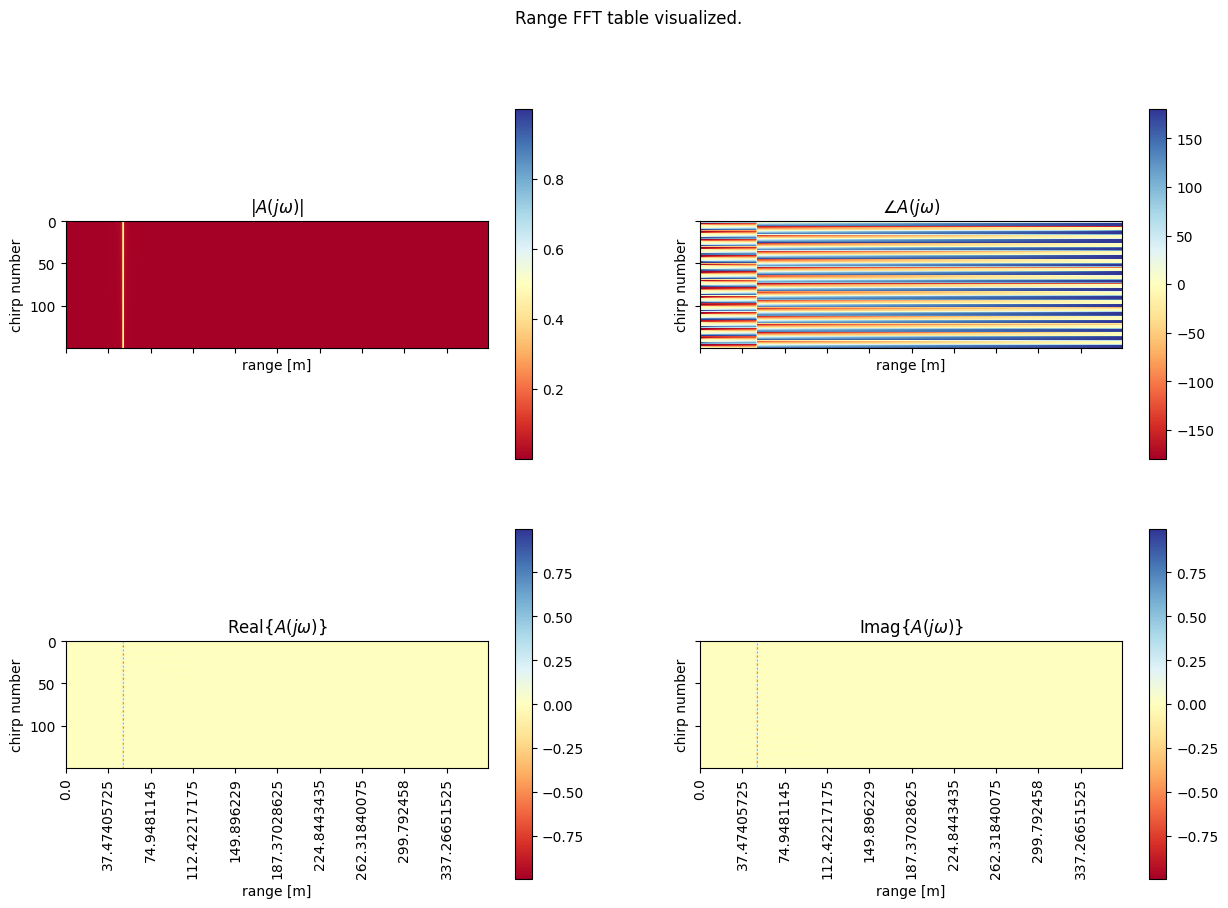

In [141]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10), sharex=True, sharey=True)
abs_axes = ax[0, 0]
phi_axes = ax[0, 1]
real_axes = ax[1, 0]
imag_axes = ax[1, 1]

im_asb = abs_axes.imshow(np.abs(range_table), cmap = plt.get_cmap('RdYlBu'))
abs_axes.set_xticks(range(ranges.size)[::50])
abs_axes.set_xticklabels(ranges[::50], rotation=90)
fig.colorbar(im_asb, ax=abs_axes)
abs_axes.set_xlabel("range [m]")
abs_axes.set_ylabel("chirp number")
abs_axes.set_title("$|A(j\omega)|$")

im_phi = phi_axes.imshow(np.angle(range_table)*360/(2*np.pi), cmap = plt.get_cmap('RdYlBu'))
fig.colorbar(im_phi, ax=phi_axes)
phi_axes.set_xlabel("range [m]")
phi_axes.set_ylabel("chirp number")
phi_axes.set_title("$∠ A(j\omega)$")
phi_axes.set_xticks(range(ranges.size)[::50])
phi_axes.set_xticklabels(ranges[::50], rotation=90)

im_real = real_axes.imshow(np.real(range_table), cmap = plt.get_cmap('RdYlBu'))
fig.colorbar(im_real, ax=real_axes)
real_axes.set_xlabel("range [m]")
real_axes.set_ylabel("chirp number")
real_axes.set_title("Real{$A(j\omega)$}")
real_axes.set_xticks(range(ranges.size)[::50])
real_axes.set_xticklabels(ranges[::50], rotation=90)

im_imag = imag_axes.imshow(np.imag(range_table), cmap = plt.get_cmap('RdYlBu'))
fig.colorbar(im_imag, ax=imag_axes)
imag_axes.set_xlabel("range [m]")
imag_axes.set_ylabel("chirp number")
imag_axes.set_title("Imag{$A(j\omega)$}");
imag_axes.set_xticks(range(ranges.size)[::50])
imag_axes.set_xticklabels(ranges[::50], rotation=90);

fig.suptitle("Range FFT table visualized.");

In [142]:
velocity_table = np.zeros((n_r, range_table.shape[1]), dtype=np.csingle)


In [143]:
for r in range(range_table.shape[1]):
    range_bin_magn = range_table[:, r]
    range_bin_fft = fft(range_bin_magn)
    velocity_table[:, r]= 2.0/n_r*range_bin_fft

In [151]:
def angle_freq_to_velocity(w):
    return w*c/(4*np.pi*f_0)

In [152]:
##omega_second = 2*np.pi*np.concatenate((np.arange(0, n_r//2), np.arange(-n_r//2, 0)[::-1]))*f_chirp/n_r


In [153]:
# velocities = angle_freq_to_velocity(omega_second)
#velocities = np.fft.fftshift(velocities)


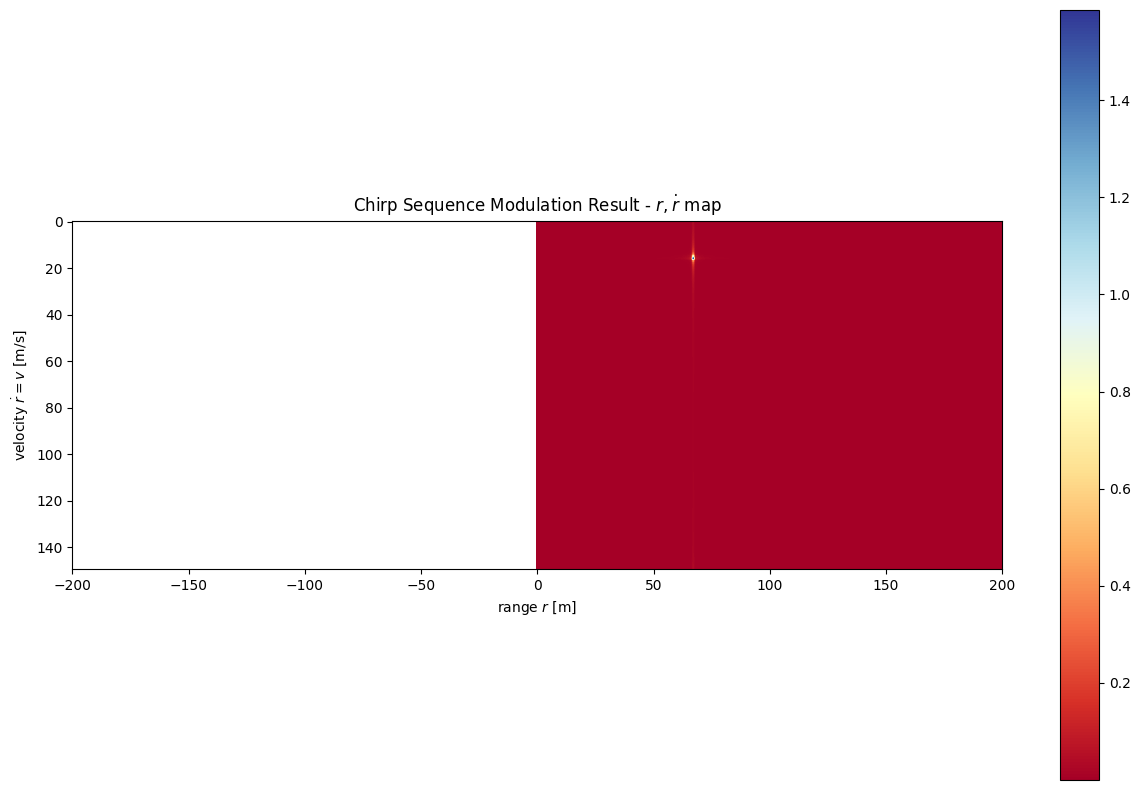

In [154]:
plt.figure(figsize=(15,10))
plt.imshow(np.abs(velocity_table), cmap = plt.get_cmap('RdYlBu'))
#plt.xticks(range(ranges.size)[::20], ranges[::20], rotation=90);
#plt.yticks(range(velocities.size)[::10], velocities[::10]);
plt.xlim([-200, 200])
plt.xlabel("range $r$ [m]")
plt.ylabel("velocity $\\dot r = v$ [m/s]");
plt.title("Chirp Sequence Modulation Result - $r, \\dot r$ map")
plt.colorbar();